# Purchase Intention Prediction

In this project, I'll explore the `Online Shoppers Purchasing Intention Dataset` available [here](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset#). The aim of this project is to understand the data and predict whether a visitor will make a purchase or not.

## Import libraries

The first step is to import the necessary libraries I'll use in this project. For working with the Artificial Neural Network, I'll use Keras with Tensorflow backend.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import os
import tensorflow
os.environ['KERAS_BACKEND'] = 'tensorflow'
import keras

from sklearn.model_selection import train_test_split

Using TensorFlow backend.


## Import dataset

Next step is to import the dataset and get basic information from it.

In [40]:
dataset = pd.read_csv('data/dataset.csv')

In [41]:
dataset.sample(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
2673,2,97.000000,0,0.0,23,418.233333,0.000000,0.008000,0.0,0.0,May,1,1,1,2,Returning_Visitor,False,False
2771,2,166.000000,2,55.0,10,1968.250000,0.014286,0.021429,0.0,0.0,May,1,1,1,6,New_Visitor,True,False
7356,0,0.000000,0,0.0,22,817.959070,0.056061,0.079518,0.0,0.0,Sep,3,2,3,1,Returning_Visitor,True,False
4549,6,98.833333,1,0.0,34,1644.857143,0.005000,0.026500,0.0,0.0,May,2,5,1,1,Returning_Visitor,False,False
3756,1,18.000000,1,16.0,33,504.000000,0.006061,0.033333,0.0,0.0,May,2,4,1,4,Returning_Visitor,False,False


Let's see if there are any null values.

In [42]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes: bool(

Seems like all cells are filled and there are no missing values. I'll also check the description of the columns to understand the range of each column.

In [43]:
dataset.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


The `mean` of each column is very varied from one another and hence scaling should help with it. Considering that `Revenue` is the target column, I'll split the dataset into test and train sets.

In [44]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.reset_index(inplace = True)
X_test.reset_index(inplace = True)

## Analysing the data

Let's take a deep dive and try to understand the role of each column and how they are spread in the dataset.

### Target column

Text(0.5, 1.0, 'Count of visitors based on revenue generated')

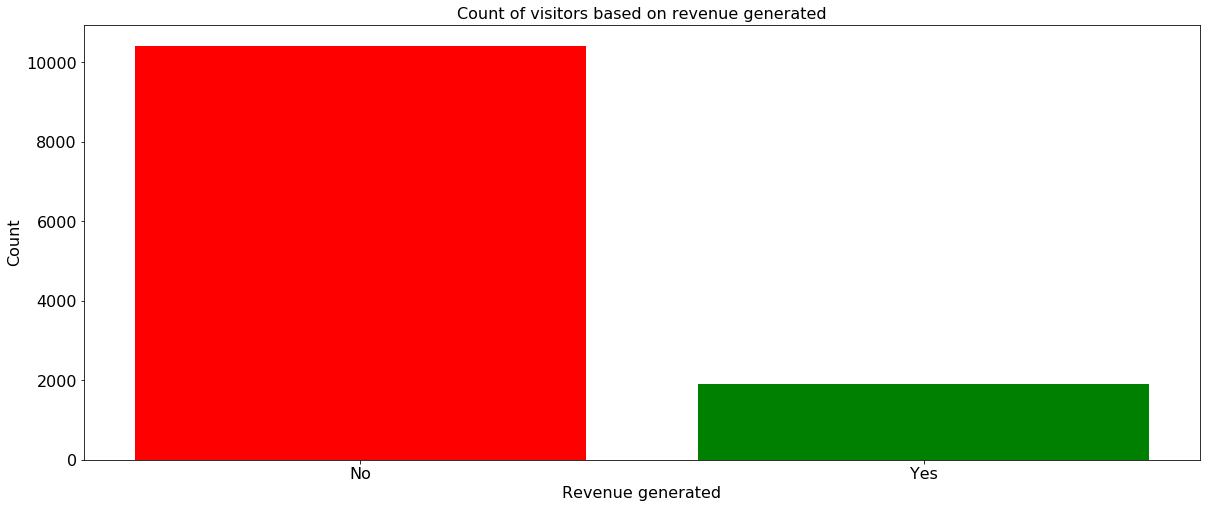

In [45]:
target_distribution = y.value_counts()

plt.figure(figsize = (20, 8))
plt.bar(target_distribution.keys().tolist(), target_distribution.tolist(), color = ['red', 'green'])

plt.xlabel('Revenue generated', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.xticks([0.0, 1.0], ['No', 'Yes'], fontsize = 16)
plt.yticks(fontsize = 16)
plt.title('Count of visitors based on revenue generated', fontsize = 16)

As is clear from the bar plot above, the dataset includes majority of feature values tha resulted in no revenue generation. The dataset is highly unbalanced. Let's see if the model is still able to learn from the data or else, we'll have to adjust the data to make the two classes relatively equal in count.

### Correlation matrix

For a change, I'll directly analyse the matrix rather than using a plotting library to create a correlation plot. However, to quickly analyse the output, I'll use the `coolwarm` cmap.

In [46]:
corr = dataset.corr()
corr.style.background_gradient(cmap = 'coolwarm')

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
Administrative,1,0.601583,0.37685,0.255848,0.431119,0.373939,-0.223563,-0.316483,0.0989896,-0.0947776,-0.00634706,-0.0250346,-0.00548681,-0.0335607,0.0264168,0.138917
Administrative_Duration,0.601583,1,0.30271,0.238031,0.289087,0.355422,-0.14417,-0.205798,0.0676085,-0.0733037,-0.00734342,-0.0153915,-0.00556056,-0.0143764,0.0149901,0.0935867
Informational,0.37685,0.30271,1,0.618955,0.374164,0.387505,-0.116114,-0.163666,0.0486317,-0.0482193,-0.00952667,-0.0382347,-0.0291686,-0.0344908,0.0357847,0.0952003
Informational_Duration,0.255848,0.238031,0.618955,1,0.280046,0.347364,-0.0740666,-0.105276,0.0308609,-0.0305765,-0.00957868,-0.019285,-0.0271441,-0.0246749,0.0240785,0.0703445
ProductRelated,0.431119,0.289087,0.374164,0.280046,1,0.860927,-0.204578,-0.292526,0.0562818,-0.0239582,0.00428962,-0.0131457,-0.0381218,-0.0430643,0.016092,0.158538
ProductRelated_Duration,0.373939,0.355422,0.387505,0.347364,0.860927,1,-0.184541,-0.251984,0.0528231,-0.0363798,0.00297579,-0.00738044,-0.0330905,-0.0363772,0.00731061,0.152373
BounceRates,-0.223563,-0.14417,-0.116114,-0.0740666,-0.204578,-0.184541,1,0.913004,-0.119386,0.0727023,0.0238232,-0.0157722,-0.00648535,0.0782855,-0.046514,-0.150673
ExitRates,-0.316483,-0.205798,-0.163666,-0.105276,-0.292526,-0.251984,0.913004,1,-0.174498,0.102242,0.0145667,-0.00444236,-0.00890701,0.0786163,-0.062587,-0.207071
PageValues,0.0989896,0.0676085,0.0486317,0.0308609,0.0562818,0.0528231,-0.119386,-0.174498,1,-0.0635413,0.0185079,0.0455919,0.0113153,0.0125317,0.0120016,0.492569
SpecialDay,-0.0947776,-0.0733037,-0.0482193,-0.0305765,-0.0239582,-0.0363798,0.0727023,0.102242,-0.0635413,1,0.0126522,0.00349875,-0.016098,0.0523014,-0.0167672,-0.0823046


It appears that `PageValues` is the most linearly correlated with our target value.

## Data engineering

I'll remove redundant columns, and update existing columns.

### Remove columns

I'll remove columns that appear to be redundant and provide no useful information towards the target class.

The relation between `Administrative` and `Administrative_Duration`, `Informational` and `Informational_Duration` and `ProductRelated` and `ProductRelated_Duration` appear to have very high correlation. This is expected as the duration spent on a type of page would surely be influenced by the number of that type of page visited. Thus, we can remove the number of pages visited of each type.

In [47]:
X_train = X_train.drop(['Administrative', 'Informational', 'ProductRelated'], axis = 1)
X_test = X_test.drop(['Administrative', 'Informational', 'ProductRelated'], axis = 1)

Also, there are columns such as `OperatingSystems`, `Region`, `TrafficType` which have less than 0.02 correlation with target values and hence, I'll remove them too.

In [48]:
X_train.drop(['OperatingSystems', 'Region', 'TrafficType'], axis = 1, inplace = True)
X_test.drop(['OperatingSystems', 'Region', 'TrafficType'], axis = 1, inplace = True)

### Encoding categorical columns

Next, I'll use `LabelEncoder` and `OneHotEncoder` to code categorical columns.

In [49]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

labelEncoder = LabelEncoder()
X_train.loc[:, 'Month'] = labelEncoder.fit_transform(X_train.loc[:, 'Month'])
X_test.loc[:, 'Month'] = labelEncoder.transform(X_test.loc[:, 'Month'])
X_train.loc[:, 'VisitorType'] = labelEncoder.fit_transform(X_train.loc[:, 'VisitorType'])
X_test.loc[:, 'VisitorType'] = labelEncoder.transform(X_test.loc[:, 'VisitorType'])
X_train.loc[:, 'Weekend'] = labelEncoder.fit_transform(X_train.loc[:, 'Weekend'])
X_test.loc[:, 'Weekend'] = labelEncoder.transform(X_test.loc[:, 'Weekend'])

In [50]:
onehotencoder = OneHotEncoder(categories = 'auto', drop = 'first')
train_cat_features = onehotencoder.fit_transform(X_train.loc[:, ['Month', 'Browser', 'VisitorType']]).toarray()
train_cat_features = pd.DataFrame(train_cat_features)
test_cat_features = onehotencoder.transform(X_test.loc[:, ['Month', 'Browser', 'VisitorType']]).toarray()
test_cat_features = pd.DataFrame(test_cat_features)

In [51]:
X_train.drop(['Month', 'Browser', 'VisitorType'], axis = 1, inplace = True)
X_train = X_train.join(train_cat_features)
X_test.drop(['Month', 'Browser', 'VisitorType'], axis = 1, inplace = True)
X_test = X_test.join(test_cat_features)

### Scaling the data

After removing some columns, I'll now scale the columns to have mean 0.

In [52]:
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
X_train = standardScaler.fit_transform(X_train)
X_test = standardScaler.transform(X_test)

## Model generation


I'll create the Artificial Neural Network now.

In [53]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import metrics

In [74]:
classifier = Sequential()
classifier.add(Dense(units = 64, activation = 'relu', input_dim = 32))
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dropout(rate = 0.1))
classifier.add(Dense(units = 64, activation = 'relu'))
classifier.add(Dropout(rate = 0.1))
classifier.add(Dense(units = 1, activation = 'relu'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_42 (Dense)             (None, 128)               8320      
_________________________________________________________________
dropout_21 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_43 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_22 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_44 (Dense)             (None, 1)                 65        
Total params: 18,753
Trainable params: 18,753
Non-trainable params: 0
_________________________________________________________________


## Training and evaluating the model

In [75]:
history = classifier.fit(X_train, y_train, epochs = 60, shuffle = False, validation_split = 0.2)

Train on 7891 samples, validate on 1973 samples
Epoch 1/60
7891/7891 [==============================] - 1s 152us/step - loss: 2.4175 - acc: 0.8492 - val_loss: 2.5243 - val_acc: 0.8434
Epoch 2/60
7891/7891 [==============================] - 0s 44us/step - loss: 1.5397 - acc: 0.8453 - val_loss: 1.1394 - val_acc: 0.8616
Epoch 3/60
7891/7891 [==============================] - 0s 45us/step - loss: 0.6782 - acc: 0.8701 - val_loss: 0.4060 - val_acc: 0.8672
Epoch 4/60
7891/7891 [==============================] - 0s 44us/step - loss: 0.4957 - acc: 0.8761 - val_loss: 0.3588 - val_acc: 0.8768
Epoch 5/60
7891/7891 [==============================] - 0s 45us/step - loss: 0.5511 - acc: 0.8733 - val_loss: 0.4276 - val_acc: 0.8586
Epoch 6/60
7891/7891 [==============================] - 0s 45us/step - loss: 0.4136 - acc: 0.8682 - val_loss: 0.3270 - val_acc: 0.8687
Epoch 7/60
7891/7891 [==============================] - 0s 45us/step - loss: 0.3885 - acc: 0.8738 - val_loss: 0.3109 - val_acc: 0.8718
Epoch 

In [76]:
y_pred = classifier.predict(X_test)
y_pred = y_pred > 0.5

from sklearn.metrics import confusion_matrix, accuracy_score
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred)*100))

Confusion matrix:
[[1982   73]
 [ 210  201]]
Accuracy: 88.52%


### Visualizing prediction

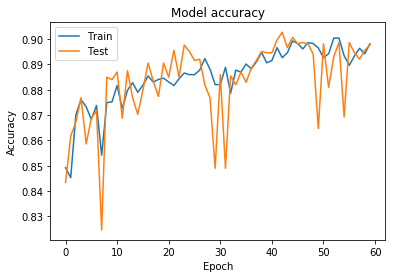

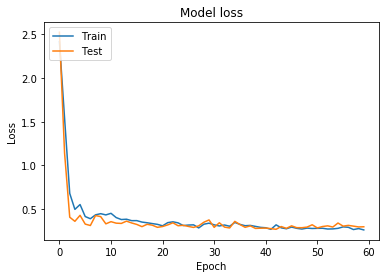

In [77]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()